In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import xarray as xr

import dask
from dask.diagnostics import ProgressBar

In [2]:
import metadata_util
spec_names = metadata_util.read_spec_names()
len(spec_names)

240

# Chemistry-only run

In [3]:
%%time
ds = xr.open_mfdataset('../rundirs/geosfp_4x5_standard/KPP_fields/ChemOnly/KPP_fields_*.nc', 
                       concat_dim='time')

CPU times: user 2.45 s, sys: 1.43 s, total: 3.88 s
Wall time: 33.5 s


In [4]:
ds.coords['nspec'] = spec_names
ds

<xarray.Dataset>
Dimensions:   (lat: 46, lev: 72, lon: 72, nphotol: 130, nphy: 4, nreact: 725, nspec: 240, time: 168)
Coordinates:
  * nspec     (nspec) <U8 'CH2I2' 'CH2ICl' 'CH2IBr' 'AERI' 'CO2' 'INDIOL' ...
Dimensions without coordinates: lat, lev, lon, nphotol, nphy, nreact, time
Data variables:
    C_before  (time, lev, lat, lon, nspec) float64 3.698e+03 1.513e+06 ...
    C_after   (time, lev, lat, lon, nspec) float64 3.698e+03 1.513e+06 ...
    PHOTOL    (time, lev, lat, lon, nphotol) float64 0.0 0.0 0.0 0.0 0.0 0.0 ...
    PHY       (time, lev, lat, lon, nphy) float64 214.5 707.9 2.391e+19 ...
    RCONST    (time, lev, lat, lon, nreact) float64 2.752e-15 2.123e-14 ...

In [5]:
ds['C_before'].nbytes/1e9

76.91894784

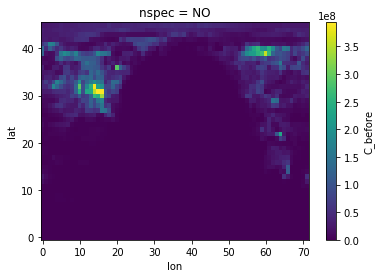

In [6]:
ds['C_before'].sel(nspec='NO')[120,0].plot()

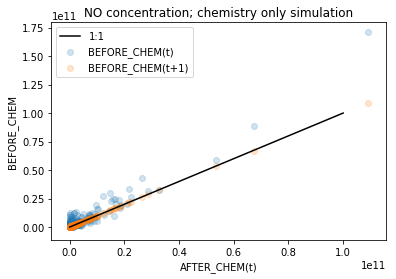

In [7]:
dr_bf = ds['C_before'].sel(nspec='NO')
dr_af = ds['C_after'].sel(nspec='NO')

plt.scatter(dr_af[0,0], dr_bf[0,0], alpha=0.2, label='BEFORE_CHEM(t)')
plt.scatter(dr_af[0,0], dr_bf[1,0], alpha=0.2, label='BEFORE_CHEM(t+1)')
plt.plot([0,1e11], [0,1e11], c='k', label='1:1')
plt.legend()
plt.ylabel('BEFORE_CHEM')
plt.xlabel('AFTER_CHEM(t)')
plt.title('NO concentration; chemistry only simulation')

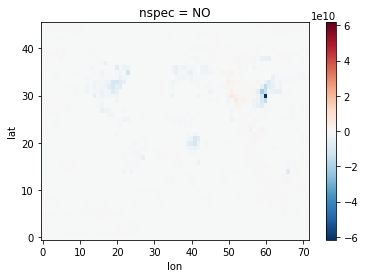

In [8]:
(dr_af[0,0] - dr_bf[0,0]).plot()

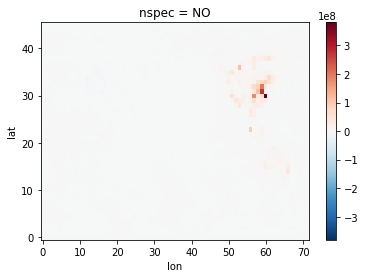

In [9]:
(dr_af[0,0] - dr_bf[1,0]).plot()

[########################################] | 100% Completed |  4min 56.7s


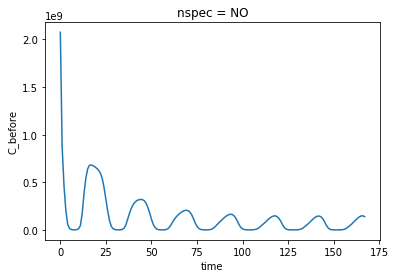

In [18]:
# I/O takes very long time!!
with ProgressBar():
    (
    ds['C_before'].sel(nspec='NO')
    .isel(lon=slice(10, 20), lat=slice(30, 40), lev=0)
    .mean(dim=['lat', 'lon'])
    .plot()
    )

[########################################] | 100% Completed |  4min 49.4s


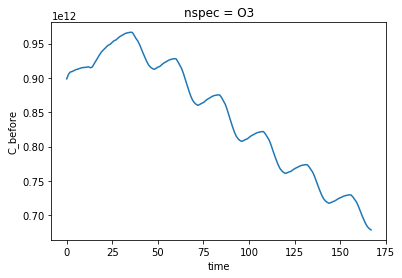

In [19]:
with ProgressBar():
    (
    ds['C_before'].sel(nspec='O3')
    .isel(lon=slice(10, 20), lat=slice(30, 40), lev=0)
    .mean(dim=['lat', 'lon'])
    .plot()
    )

# Compare to standard run

In [10]:
%%time
ds_ref = xr.open_mfdataset('../rundirs/geosfp_4x5_HetChemOff/KPP_fields/KPP_fields_*.nc', 
                           concat_dim='time')

CPU times: user 2.49 s, sys: 1.59 s, total: 4.08 s
Wall time: 29.9 s


In [11]:
ds_ref.coords['nspec'] = spec_names

[########################################] | 100% Completed |  5min 15.4s


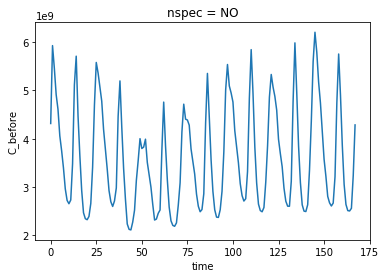

In [12]:
with ProgressBar():
    (
    ds_ref['C_before'].sel(nspec='NO')
    .isel(lon=slice(10, 20), lat=slice(30, 40), lev=0)
    .mean(dim=['lat', 'lon'])
    .plot()
    )

[########################################] | 100% Completed |  5min 53.0s


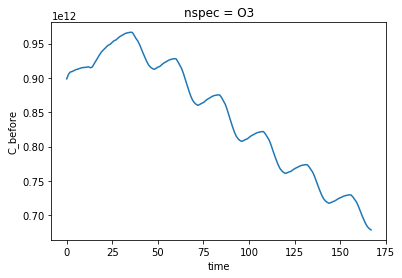

In [13]:
with ProgressBar():
    (
    ds['C_before'].sel(nspec='O3')
    .isel(lon=slice(10, 20), lat=slice(30, 40), lev=0)
    .mean(dim=['lat', 'lon'])
    .plot()
    )